In [1]:
# Módulo/bibliotecas utilizadas
import numpy as np
from scipy import linalg
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
# Define caminhos de input e output
URL = 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv'   # url de dados (input)
IMG_PATH  = './'

In [4]:
cols = ['year','month','date_excel','date','CO2[ppm]',
        'seasonally_adjusted','fit','seasonally_adjusted_fit',
        'CO2_filled','seasonally_adjusted_filled','station']

df = pd.read_csv(URL,header=63, names=cols,usecols=['year', 'month','date_excel','date','CO2[ppm]'])

In [5]:
# Substitui flag -99.99 (ausência de dados por NaN)
df[df['CO2[ppm]']==-99.99] = np.nan

# Remove NaNs
df = df.dropna()

# Indexa dataframe com a data
df = df.set_index('date')

In [6]:
df

,year,month,date_excel,CO2[ppm]
date,,,,
1958.2027,1958.0,3.0,21259.0,315.71
1958.2877,1958.0,4.0,21290.0,317.45
1958.3699,1958.0,5.0,21320.0,317.51
1958.5370,1958.0,7.0,21381.0,315.87
1958.6219,1958.0,8.0,21412.0,314.93
...,...,...,...,...
2023.8740,2023.0,11.0,45245.0,420.12
2023.9562,2023.0,12.0,45275.0,421.65
2024.0410,2024.0,1.0,45306.0,422.62


Text(0.5, 1.0, 'CO$_2$ atmosférico em Manua Loa, Havaí')

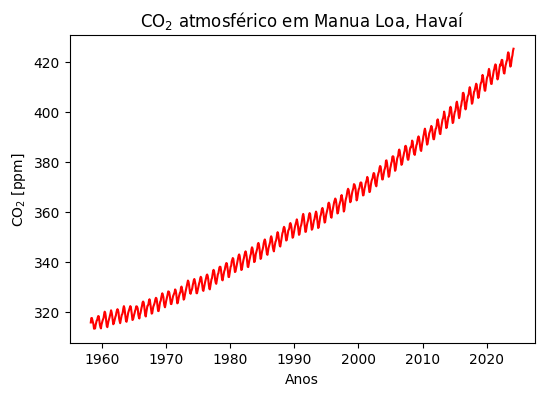

In [10]:
fig, ax = plt.subplots(figsize=(6,4))

df['CO2[ppm]'].plot(ax=ax, color ='red')
ax.set_ylabel(r'CO$_2$ [ppm]')
ax.set_xlabel('Anos')
ax.set_title('CO$_2$ atmosférico em Manua Loa, Havaí')

In [11]:
y = df['CO2[ppm]'].values         # CO2
t = (df.index-df.index[0]).values # tempo em fração de ano

In [12]:
# Calcula e remove tendência linear
A = np.ones((len(t),2))
A[:,1] = t
x = linalg.inv(A.T@A)@A.T@y
yfit_linear =  x[0] + x[1]*t

Text(0.5, 1.0, 'CO$_2$ atmosférico em Manua Loa (Havaí) com tendência linear')

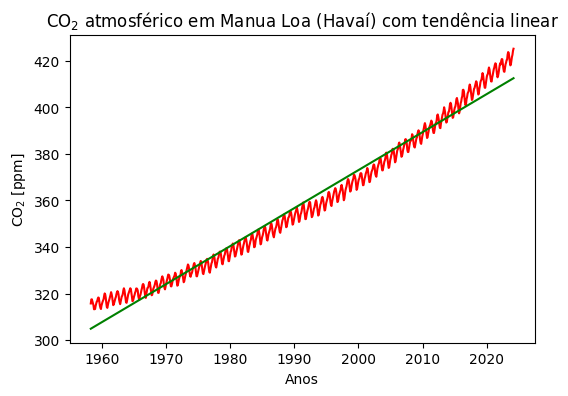

In [19]:
# Plota série original e tendência linear
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(df.index,y, color = 'red')
ax.plot(df.index,yfit_linear,color = 'green')
ax.set_ylabel(r'CO$_2$ [ppm]')
ax.set_xlabel('Anos')
ax.set_title('CO$_2$ atmosférico em Manua Loa (Havaí) com tendência linear')

Text(0.5, 0, 'Anos')

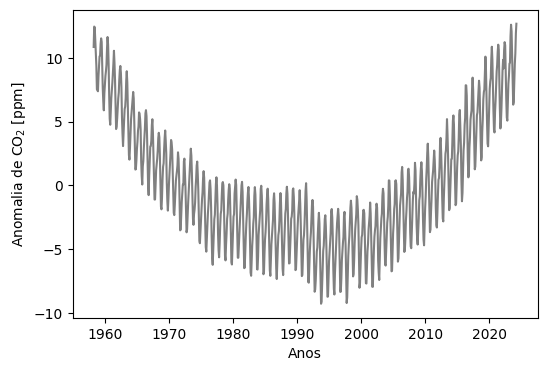

In [25]:
# Plota resíduos
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(df.index,y-yfit_linear, color = 'gray')
ax.set_ylabel(r'Anomalia de CO$_2$ [ppm]')
ax.set_xlabel('Anos')

In [26]:
# Repete o cálculo com tendência quadrática
A = np.ones((len(t),3))
A[:,1] = t
A[:,2] = t**2
x = linalg.inv(A.T@A)@A.T@y
yfit_quadratico =  x[0] + x[1]*t + x[2]*(t**2)

Text(0.5, 0, 'Anos')

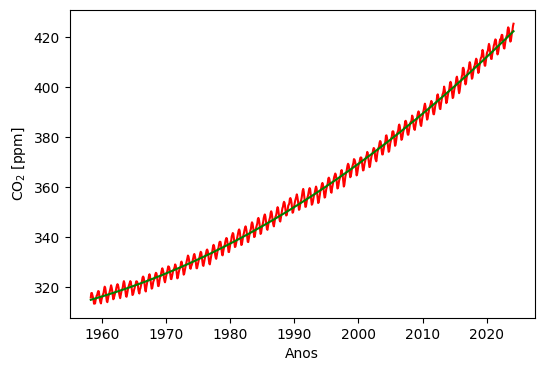

In [31]:
# Plota série original e tendência quadrática
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(df.index,y, color = 'red')
ax.plot(df.index,yfit_quadratico, color='green')
ax.set_ylabel(r'CO$_2$ [ppm]')
ax.set_xlabel('Anos')

Text(0.5, 0, 'Anos')

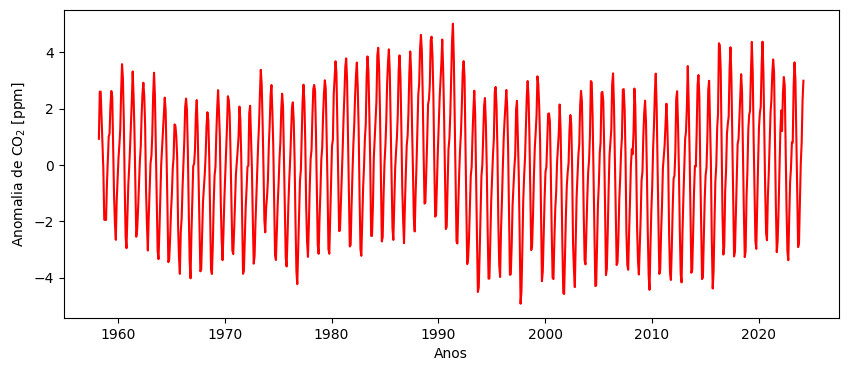

In [32]:
# Plot resíduos
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df.index,y-yfit_quadratico, color = 'red')
ax.set_ylabel(r'Anomalia de CO$_2$ [ppm]')
ax.set_xlabel('Anos')

In [33]:
# Compósito mensal de anomalia de CO2
df['anomCO2[ppm]'] = y-yfit_quadratico

In [36]:
df_monthly_composite = df.drop(columns='CO2[ppm]').groupby('month').mean() #agrupa os dados por mês

Text(0.5, 1.0, 'Anomalia de CO$_2$ atmosférico em Manual Loa agrupados por mês')

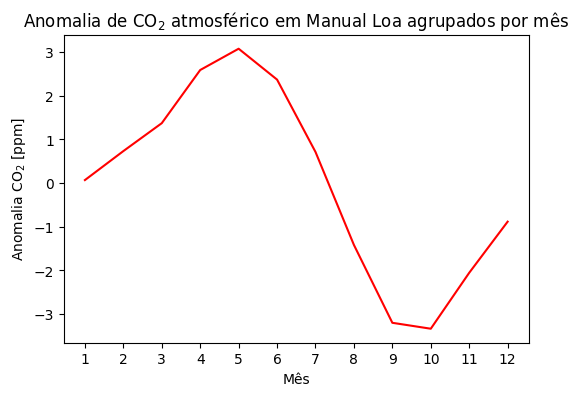

In [40]:
# Plote em linha
fig, ax = plt.subplots(figsize=(6,4))

df_monthly_composite['anomCO2[ppm]'].plot(color = 'red')

ax.set_xticks(np.arange(1,13))
ax.set_ylabel(r'Anomalia CO$_2$ [ppm]')
ax.set_xlabel('Mês')
ax.set_title('Anomalia de CO$_2$ atmosférico em Manual Loa agrupados por mês')
#plt.grid() #plota a grade

Text(0.5, 1.0, 'Anomalia de CO$_2$ atmosférico em Manual Loa')

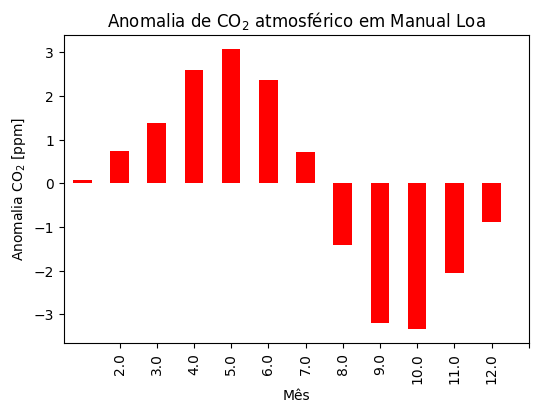

In [42]:
# Plote em barras
fig, ax = plt.subplots(figsize=(6,4))

df_monthly_composite['anomCO2[ppm]'].plot.bar(color = 'red')

ax.set_xticks(np.arange(1,13))
ax.set_ylabel(r'Anomalia CO$_2$ [ppm]')
ax.set_xlabel('Mês')
ax.set_title('Anomalia de CO$_2$ atmosférico em Manual Loa')
#plt.grid()